In [1]:
import gaussianfft
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist
from util import EmpiricalVariogram, PaddingAnalyzer, PaddingAnalyzerDefaults
%matplotlib inline

This notebook compares the estimated variograms and how the error/deviation from the true variogram looks at different distances. For each variogram type, three sets of plots are generated: low range-to-grid-size ratio, range-to-grid-size aprx 1.0 and high range-to-grid-size ratio. Ideally, it is possible to derive a method for choosing the padding that only depends on the range and variogram type.

The following limitations must be considered:
- It is assumed that the variogram estimation has converged
- The variogram is estimated from the point (0, 0, 0), only
- The analysis is independent of L (grid size) and n (number of grid cells)
- The analysis is performed only for a cube and an isotropic variogram

In [3]:
def plot5(r: PaddingAnalyzer, vmin=-0.25, vmax=.25):
    plt.rcParams['figure.figsize'] = [20, 6 * len(r.range)]
    for ir in range(len(r.range)):
        plt.subplot(100*len(r.range) + 10 + 1*ir + 1)
        plt.title(r.range[ir])
        ndelta = r.deltas.shape[2]
        plt.contourf(r.grid, r.padding_f, r.deltas[:, ir, :], 40, vmin=vmin, vmax=vmax, cmap='bwr')
        plt.colorbar()

In [4]:
# Range definitions (original setup)
low_range = np.linspace(0.05, 0.45, 9)
equal_range = np.linspace(0.8, 1.2, 5)
high_range = np.linspace(2, 10, 9)

padding = np.arange(1, 21) * 0.5

In [8]:
# Range definitions (optional setup with less padding)
padding = np.linspace(0, 2.5, 11)

In [11]:
PaddingAnalyzerDefaults.nmax=6000
PaddingAnalyzerDefaults.seed=1333
PaddingAnalyzerDefaults.ndims=1

# Dimension == 1

## Spherical

*** 0/9 ***
  Total time spent: 0.00
*** 1/9 ***
  Total time spent: 32.57
*** 2/9 ***
  Total time spent: 66.10
*** 3/9 ***
  Total time spent: 102.64
*** 4/9 ***
  Total time spent: 139.83
*** 5/9 ***
  Total time spent: 175.71
*** 6/9 ***
  Total time spent: 208.86
*** 7/9 ***
  Total time spent: 261.73
*** 8/9 ***
  Total time spent: 314.74


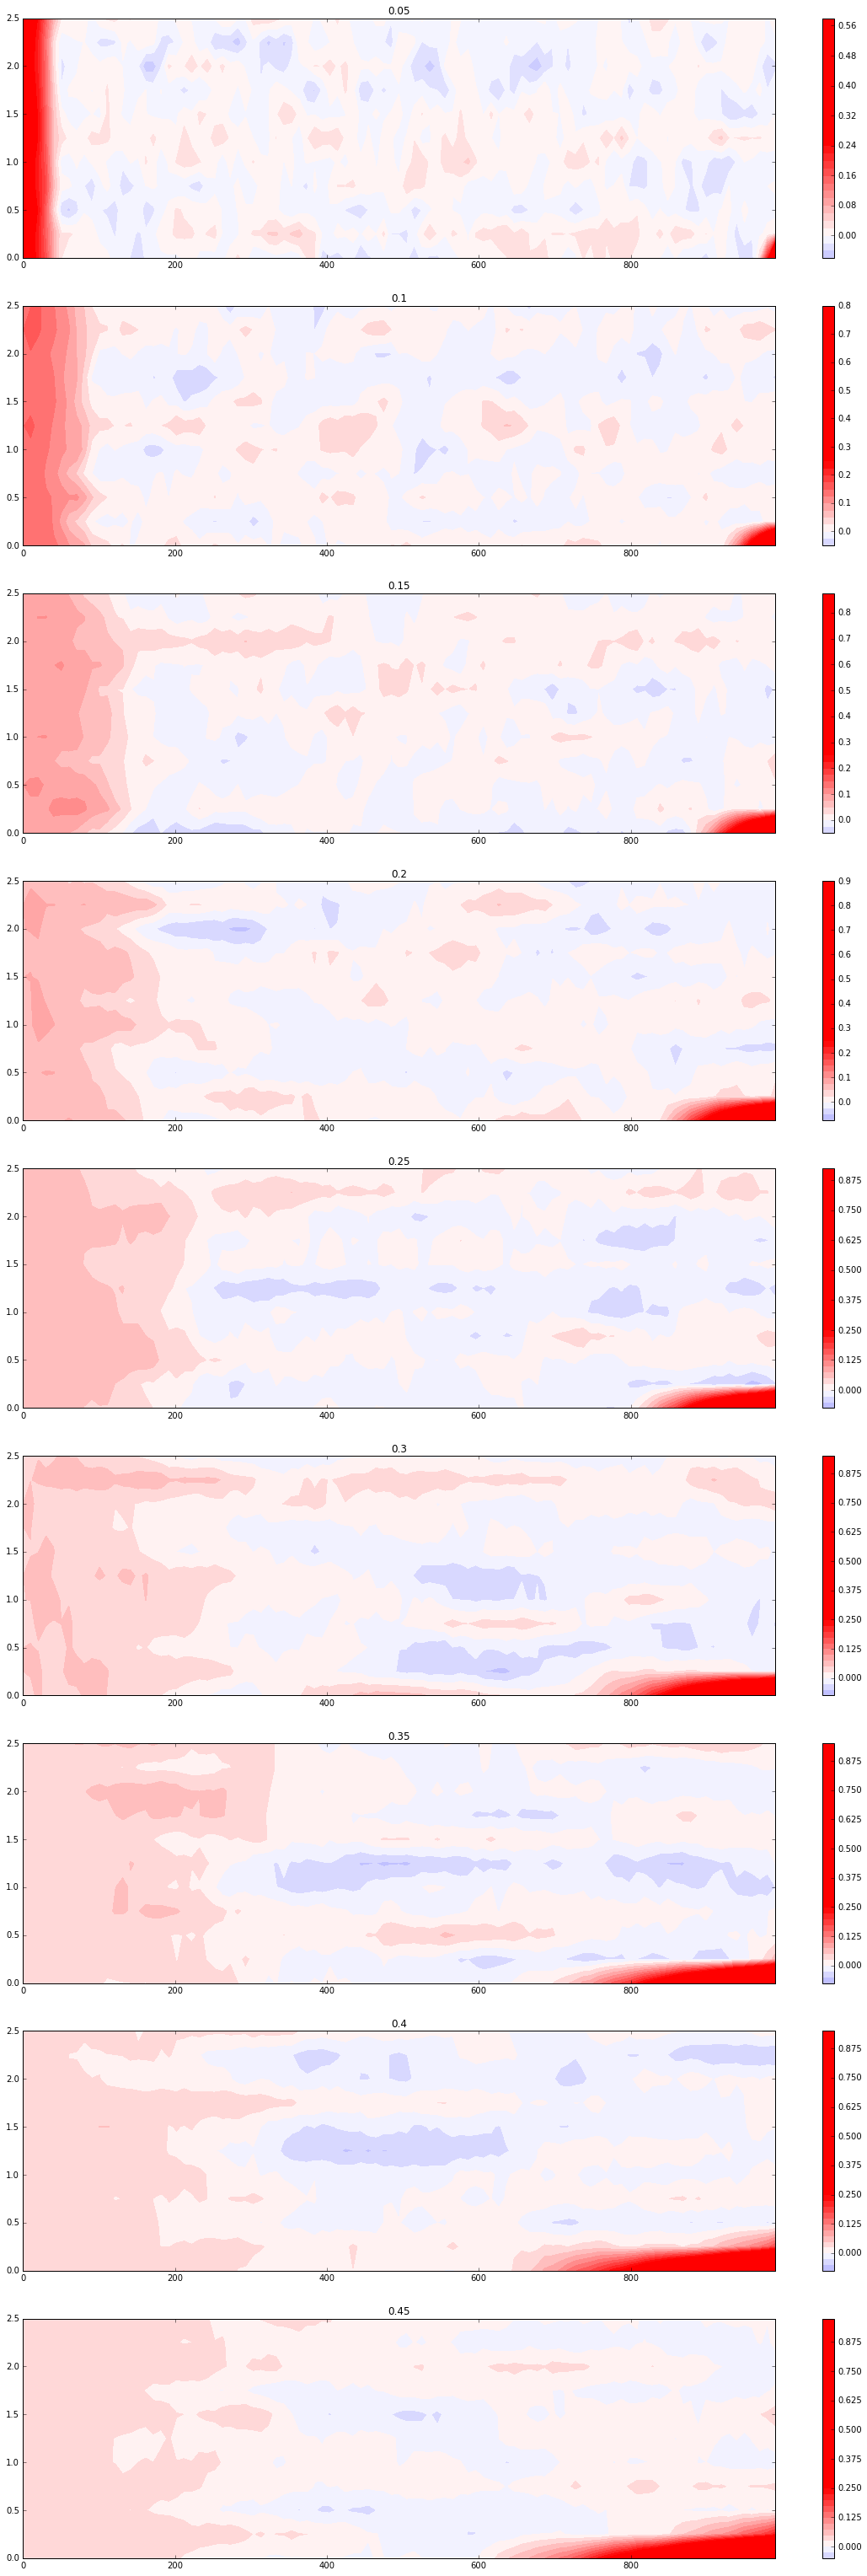

In [12]:
# Short range
rpa_short = PaddingAnalyzer(low_range, padding, vtype='spherical')
np.savez('spherical_short.npz', grid=rpa_short.grid, range=rpa_short.range, padding_f=rpa_short.padding_f)
plot5(rpa_short)

*** 0/5 ***
  Total time spent: 0.00
*** 1/5 ***
  Total time spent: 57.14
*** 2/5 ***
  Total time spent: 110.08
*** 3/5 ***
  Total time spent: 161.12
*** 4/5 ***
  Total time spent: 209.06


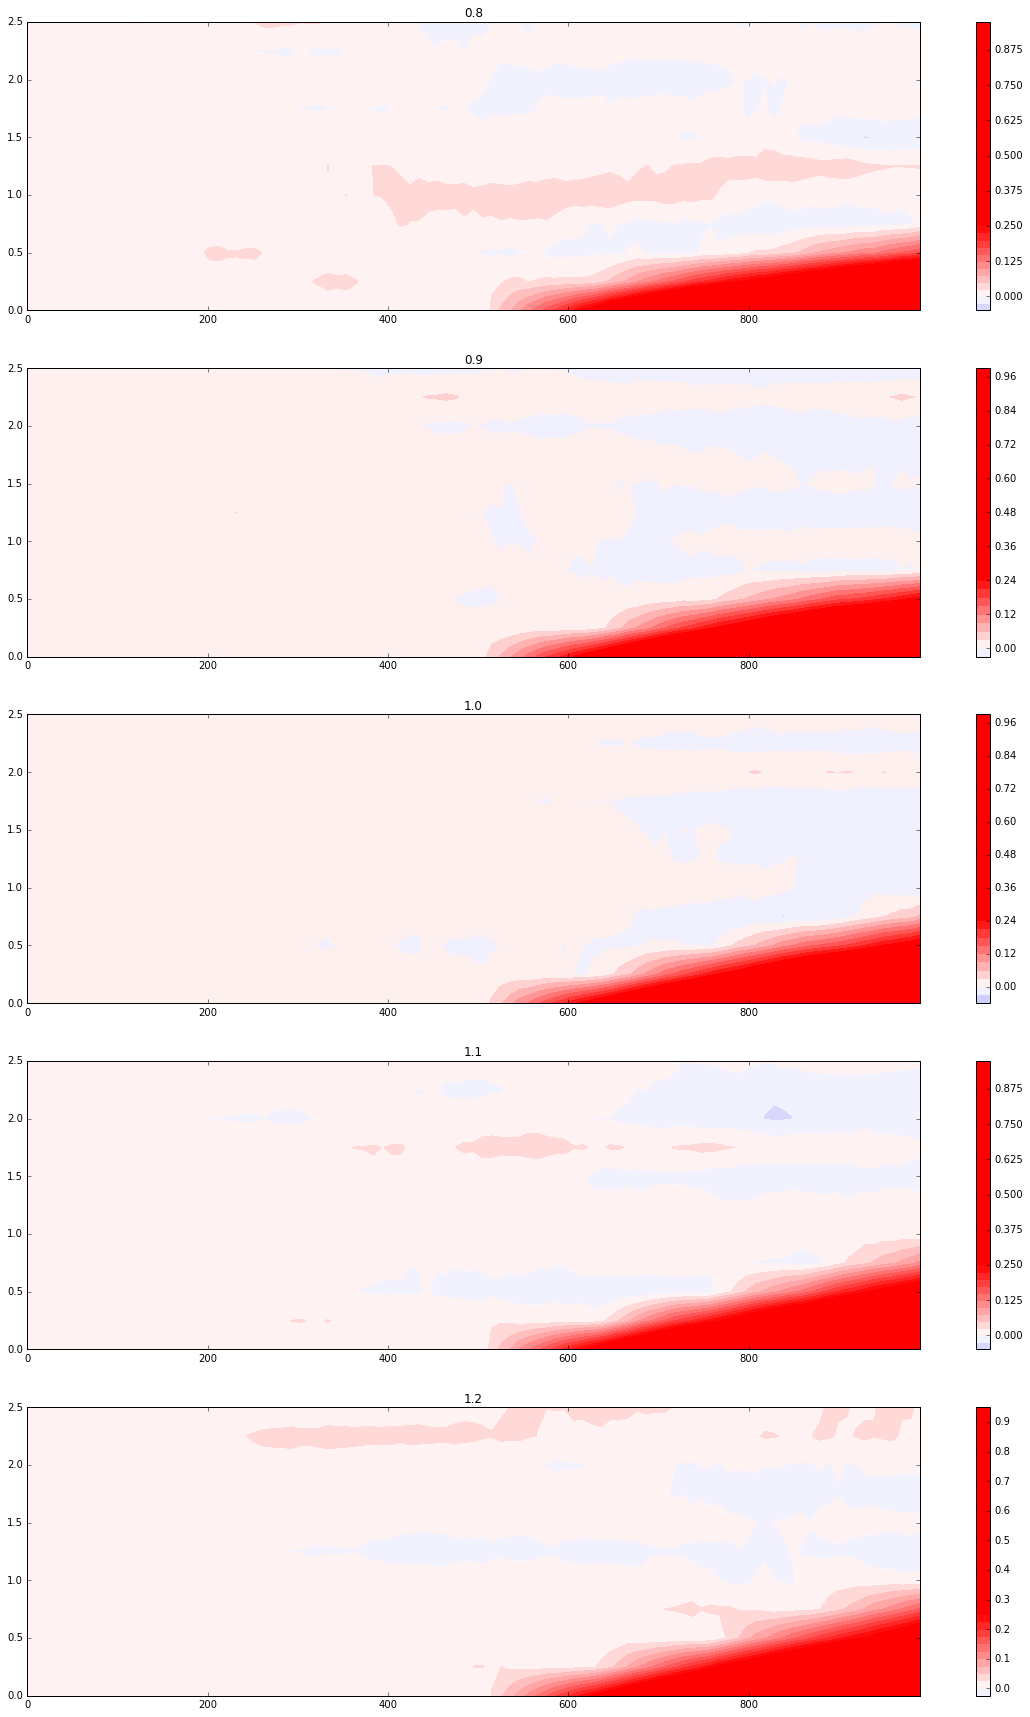

In [13]:
# Equal range
rpa_equal = PaddingAnalyzer(equal_range, padding, vtype='spherical')
np.savez('spherical_equal.npz', grid=rpa_equal.grid, range=rpa_equal.range, padding_f=rpa_equal.padding_f)
plot5(rpa_equal)

*** 0/9 ***
  Total time spent: 0.00
*** 1/9 ***
  Total time spent: 35.52
*** 2/9 ***
  Total time spent: 70.08
*** 3/9 ***
  Total time spent: 104.64
*** 4/9 ***
  Total time spent: 139.06
*** 5/9 ***
  Total time spent: 174.17
*** 6/9 ***
  Total time spent: 212.13
*** 7/9 ***
  Total time spent: 255.73
*** 8/9 ***
  Total time spent: 292.93


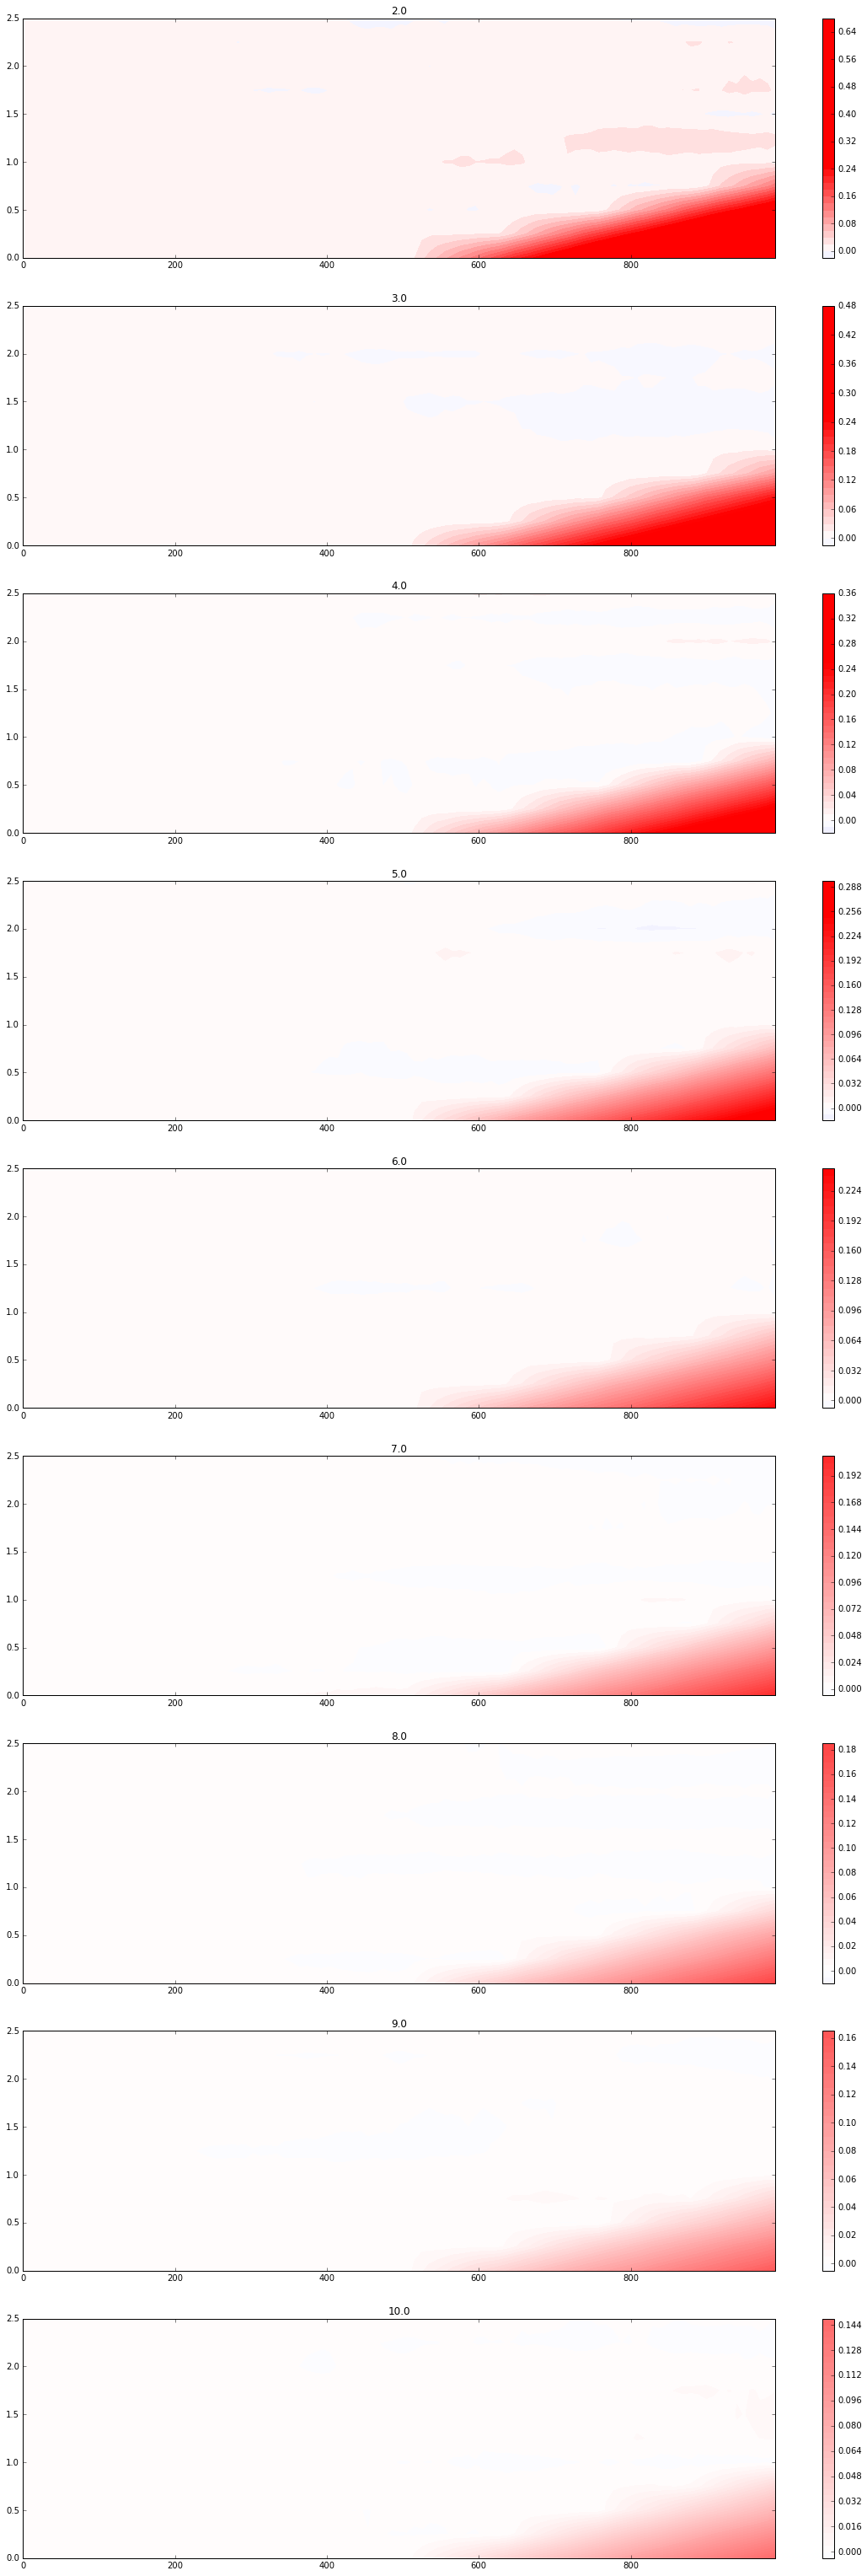

In [14]:
# High range
rpa_high = PaddingAnalyzer(high_range, padding, vtype='spherical')
np.savez('spherical_high.npz', grid=rpa_high.grid, range=rpa_high.range, padding_f=rpa_high.padding_f)
plot5(rpa_high)

## Gaussian

In [15]:
PaddingAnalyzerDefaults.nmax=5000

*** 0/9 ***
  Total time spent: 0.00
*** 1/9 ***
  Total time spent: 29.31
*** 2/9 ***
  Total time spent: 59.34
*** 3/9 ***
  Total time spent: 89.41
*** 4/9 ***
  Total time spent: 119.52
*** 5/9 ***
  Total time spent: 149.91
*** 6/9 ***
  Total time spent: 180.28
*** 7/9 ***
  Total time spent: 210.57
*** 8/9 ***
  Total time spent: 241.47


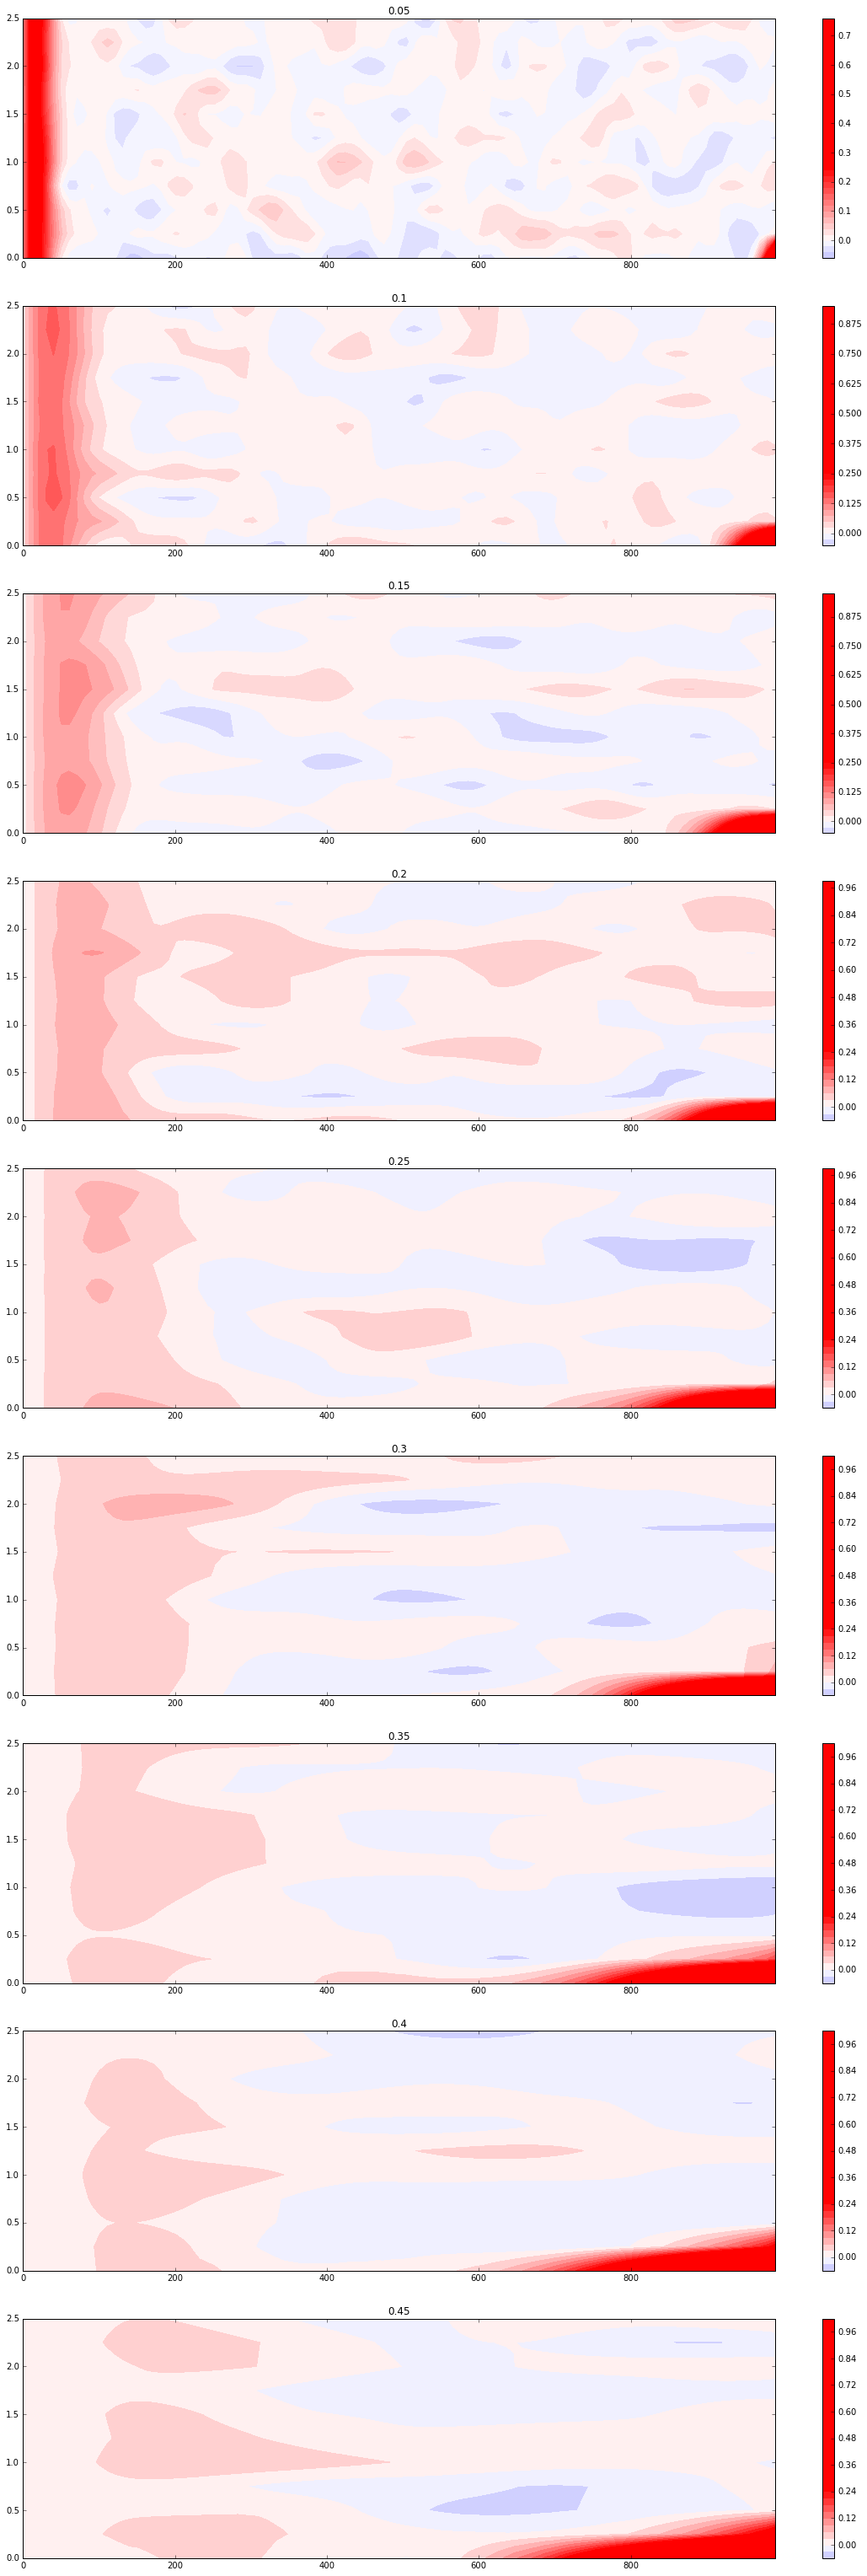

In [16]:
# Short range
rpa_short = PaddingAnalyzer(low_range, padding, vtype='gaussian')
np.savez('gaussian_short.npz', grid=rpa_short.grid, range=rpa_short.range, padding_f=rpa_short.padding_f)
plot5(rpa_short)

*** 0/5 ***
  Total time spent: 0.00
*** 1/5 ***
  Total time spent: 31.49
*** 2/5 ***
  Total time spent: 61.52
*** 3/5 ***
  Total time spent: 91.74
*** 4/5 ***
  Total time spent: 121.08


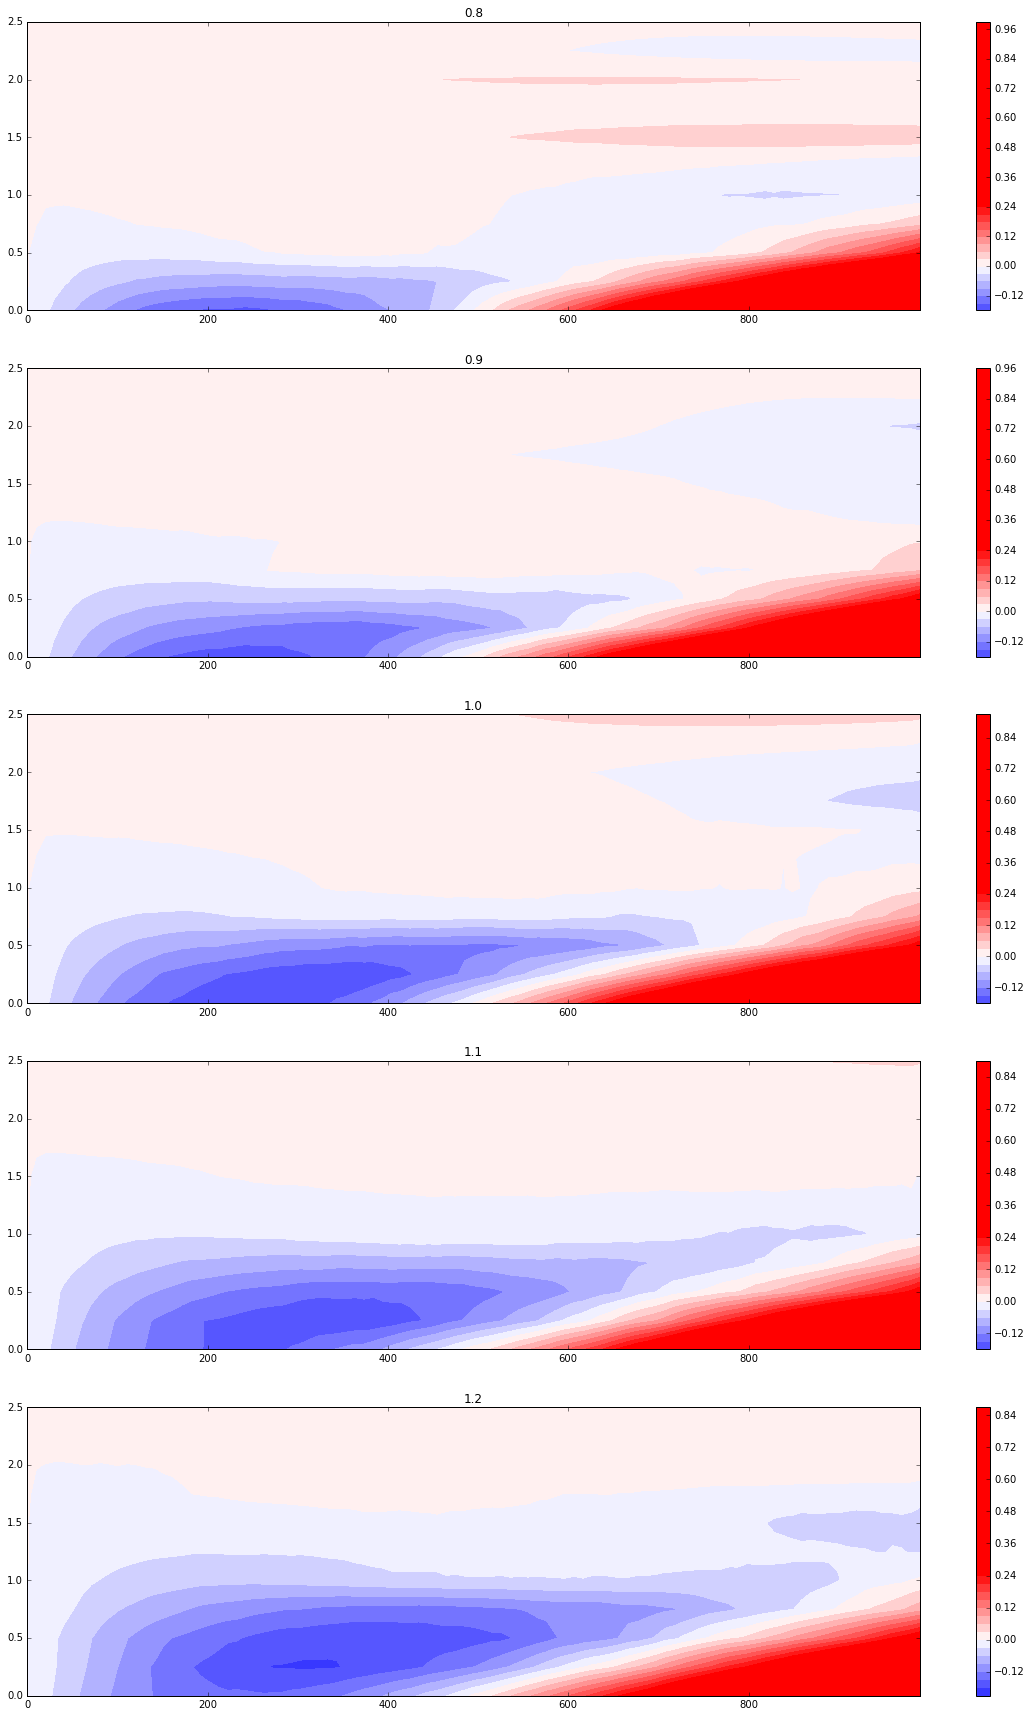

In [17]:
# Equal range
rpa_equal = PaddingAnalyzer(equal_range, padding, vtype='gaussian')
np.savez('gaussian_equal.npz', grid=rpa_equal.grid, range=rpa_equal.range, padding_f=rpa_equal.padding_f)
plot5(rpa_equal)

*** 0/9 ***
  Total time spent: 0.00
*** 1/9 ***
  Total time spent: 34.66
*** 2/9 ***
  Total time spent: 65.61
*** 3/9 ***
  Total time spent: 97.11
*** 4/9 ***
  Total time spent: 128.11
*** 5/9 ***
  Total time spent: 158.08
*** 6/9 ***
  Total time spent: 187.51
*** 7/9 ***
  Total time spent: 217.51
*** 8/9 ***
  Total time spent: 247.17


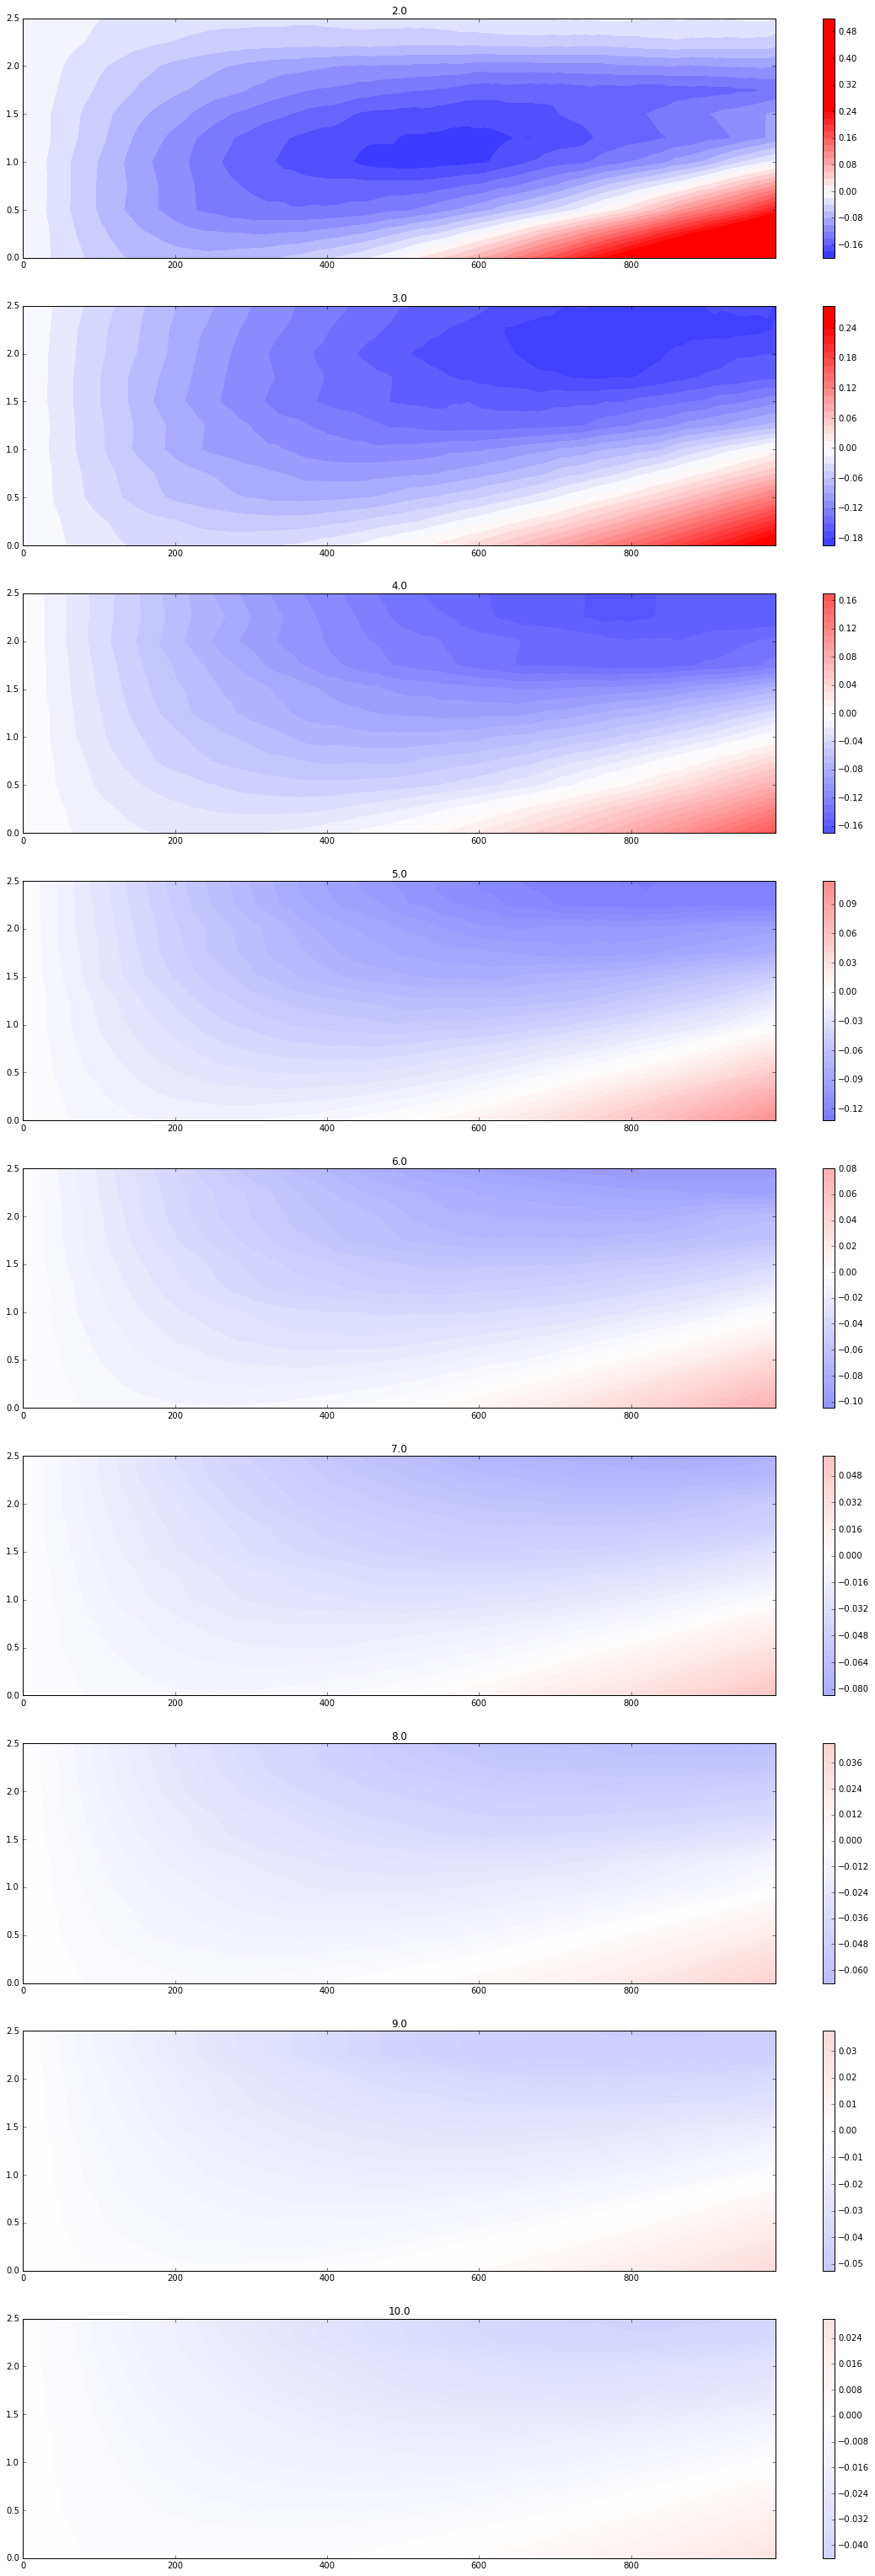

In [18]:
# High range
rpa_high = PaddingAnalyzer(high_range, padding, vtype='gaussian')
np.savez('gaussian_high.npz', grid=rpa_high.grid, range=rpa_high.range, padding_f=rpa_high.padding_f)
plot5(rpa_high)

# Dimension == 2

This is time consuming. It may help to only look at shorter padding

In [14]:
PaddingAnalyzerDefaults.ndims=2

*** 0/5 ***
  Total time spent: 0.00
*** 1/5 ***
  Total time spent: 69.35
*** 2/5 ***
  Total time spent: 136.92
*** 3/5 ***
  Total time spent: 204.65
*** 4/5 ***
  Total time spent: 271.83


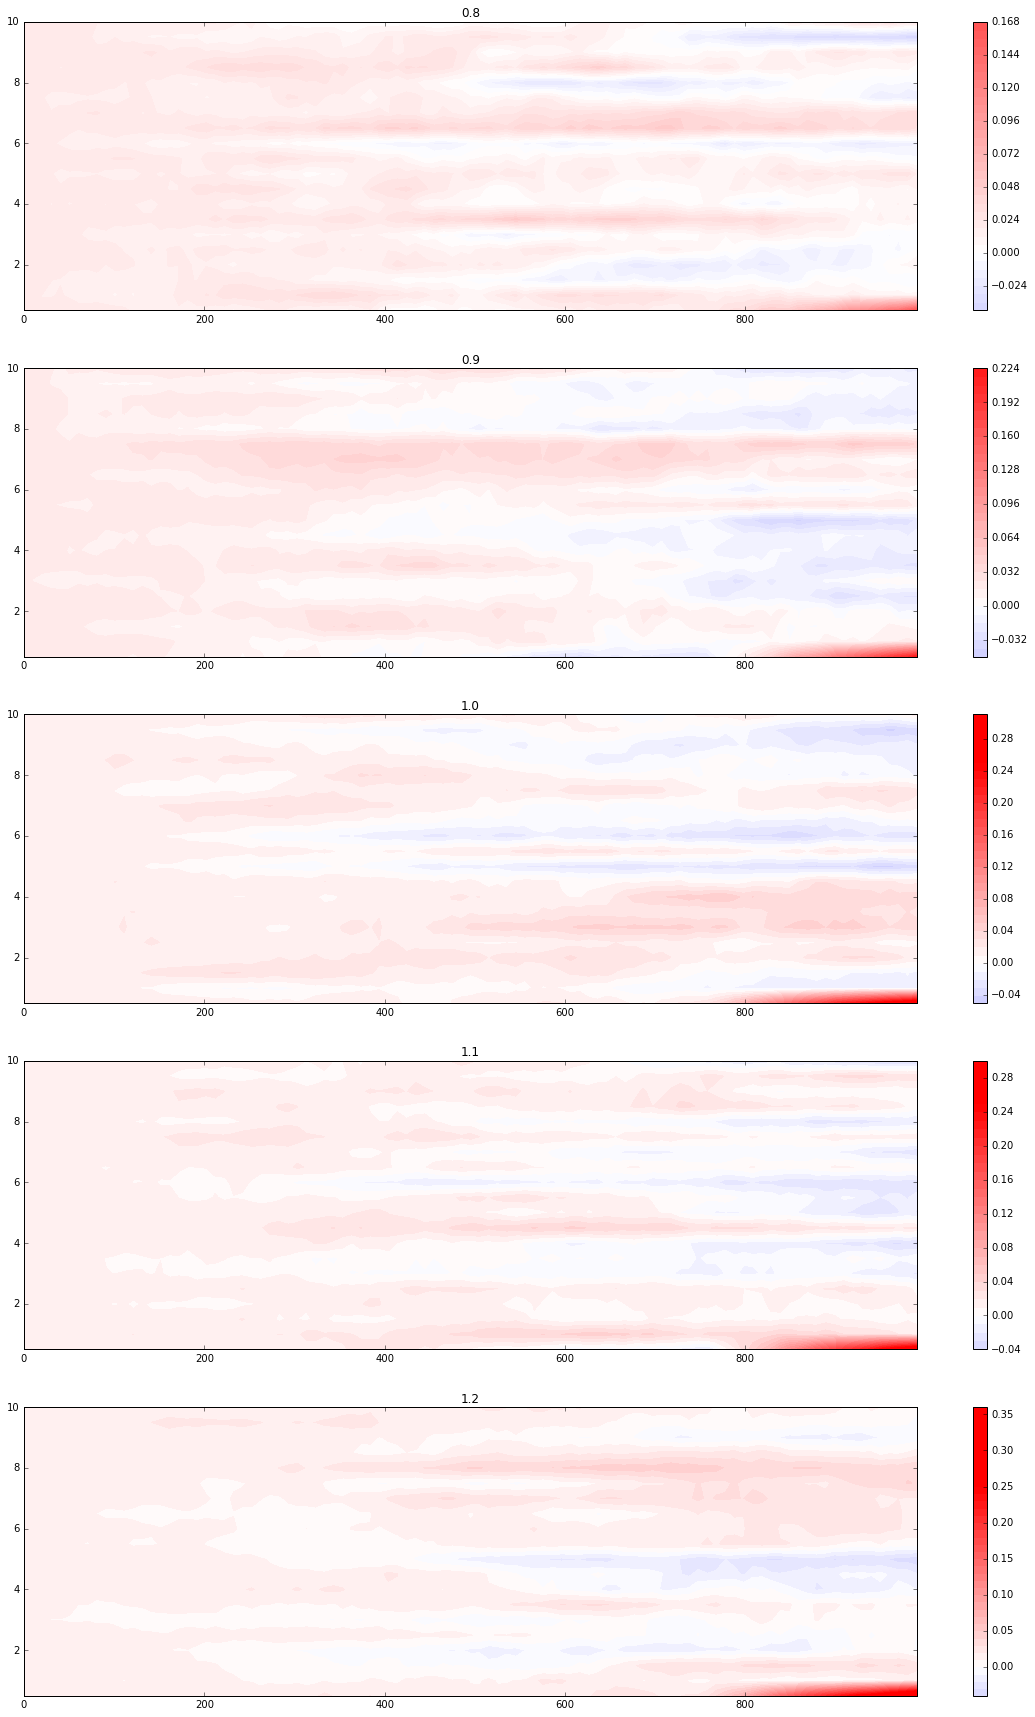

In [7]:
PaddingAnalyzerDefaults.nmax=6000
# Equal range
rpa_equal = PaddingAnalyzer(equal_range, padding, vtype='spherical')
np.savez('spherical_equal.npz', grid=rpa_equal.grid, range=rpa_equal.range, padding_f=rpa_equal.padding_f)
plot5(rpa_equal)